In [1]:
from scipy.stats import pareto
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
%matplotlib inline

Распределение Парето
$$p(x) = \frac{b}{x^{b + 1}}
\\
EX = \frac{b}{b - 1}
\\
DX = \frac{b}{(b - 1)^2 (b - 2)}$$
Тогда стандартное отклонение
$$\sigma = \sqrt{\frac{DX}{n}} $$

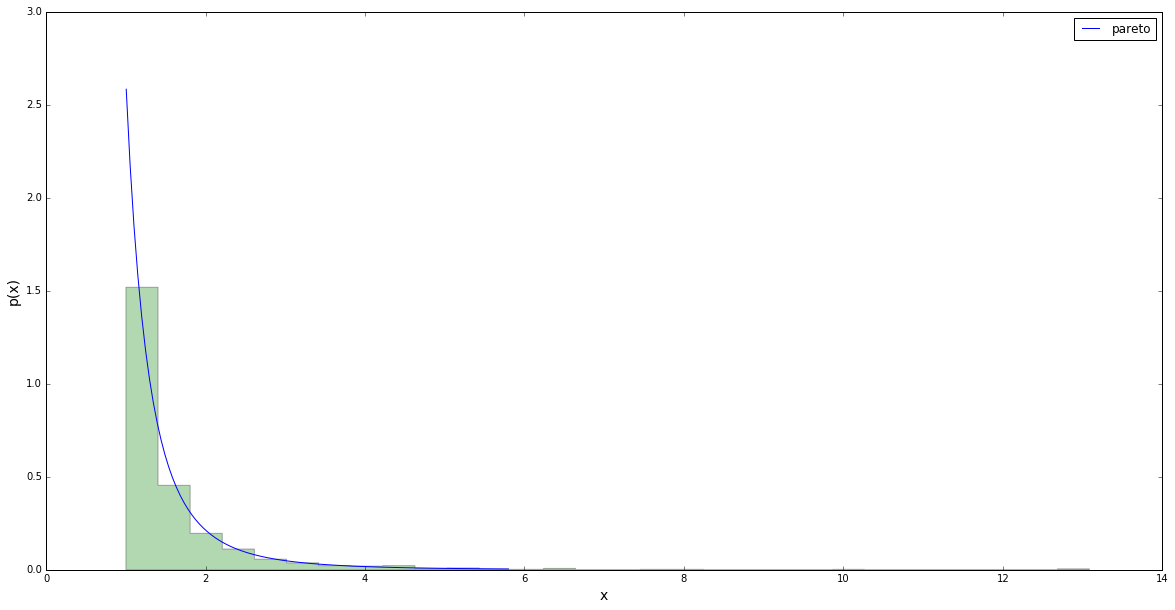

In [2]:
b = 2.62 
r = pareto.rvs(b, size=1000)
fig, ax = plt.subplots(figsize=(20, 10))
quantile1 = pareto.ppf(0.01, b)
quantile2 = pareto.ppf(0.99, b)
x = np.linspace(quantile1, quantile2, 100)
ax.plot(x, pareto.pdf(x, b), label = 'pareto')
ax.hist(r, normed=True, bins = 30, histtype='stepfilled', alpha=0.3)
plt.xlabel('x', fontsize=14)
plt.ylabel('p(x)', fontsize=14)
# ?plt.hist
ax.legend()

In [24]:
def generate_ev_sample(n):
    smp = list()
    aprox_cpt = norm.rvs(b/ (b - 1), b/((b - 1)**2) * (b - 2) * n)
    for i in range(1000):
        r = pareto.rvs(b, size = n)
        smp.append(np.mean(r))
    lc = b / (b - 1)
    sc =  (b/((b - 1)**2 * (b - 2) * n))**(0.5)
    x = np.linspace(norm.ppf(0.01, loc = lc, scale = sc), norm.ppf(0.99, loc = lc, scale = sc), 100)
    fig, ax =  plt.subplots(figsize=(20, 10))
    plt.xlabel('x', fontsize=14)
    plt.ylabel('p(x)', fontsize=14)
    ax.plot(x, norm.pdf(x, loc = lc, scale =sc))
    ax.hist(smp, normed = True, bins = min(max(20, n), 50) , histtype = 'stepfilled', alpha = 0.3)

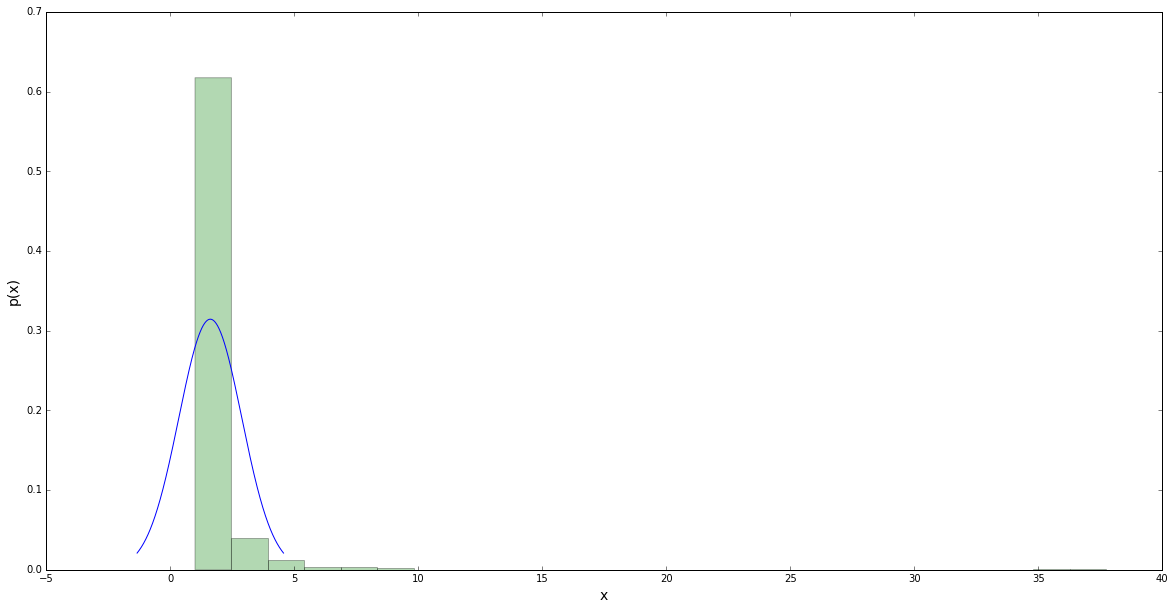

In [25]:
generate_ev_sample(1)

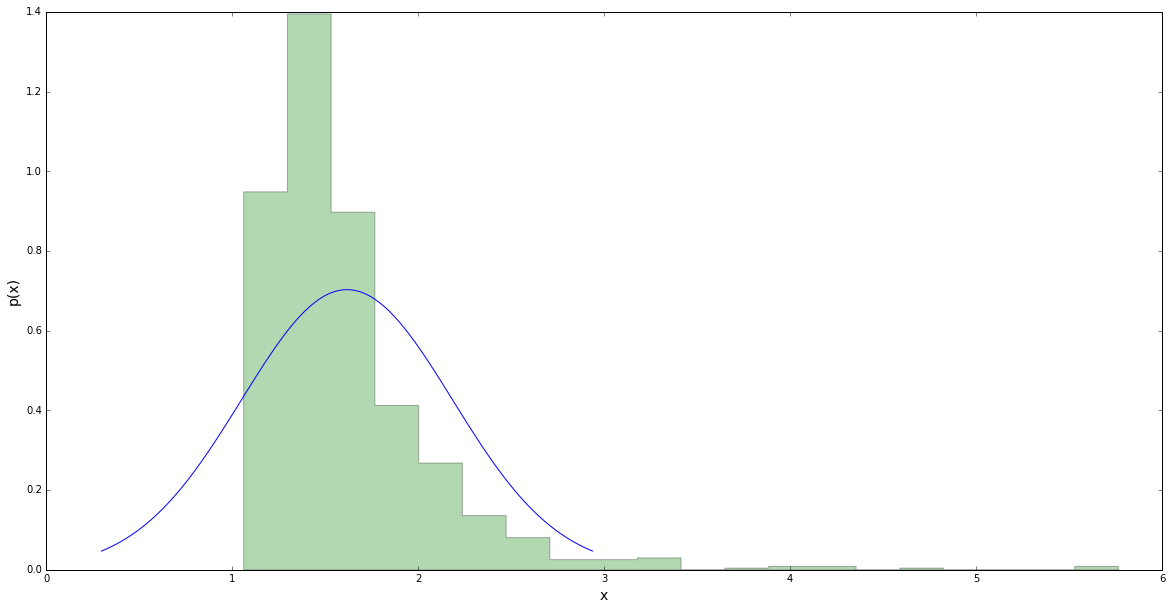

In [5]:
generate_ev_sample(5)

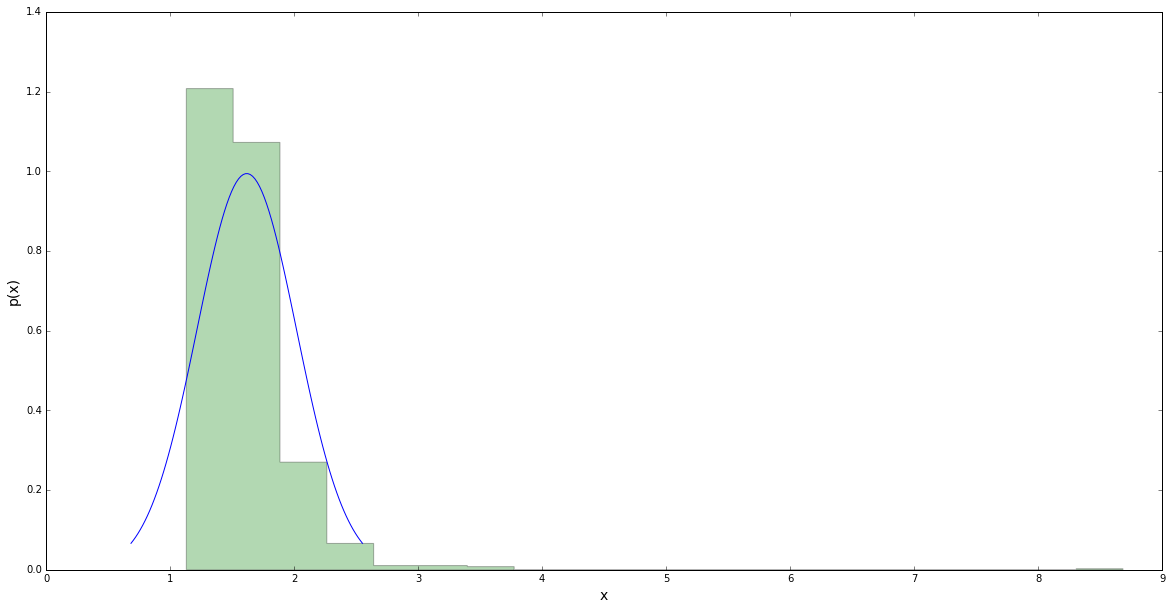

In [6]:
generate_ev_sample(10)

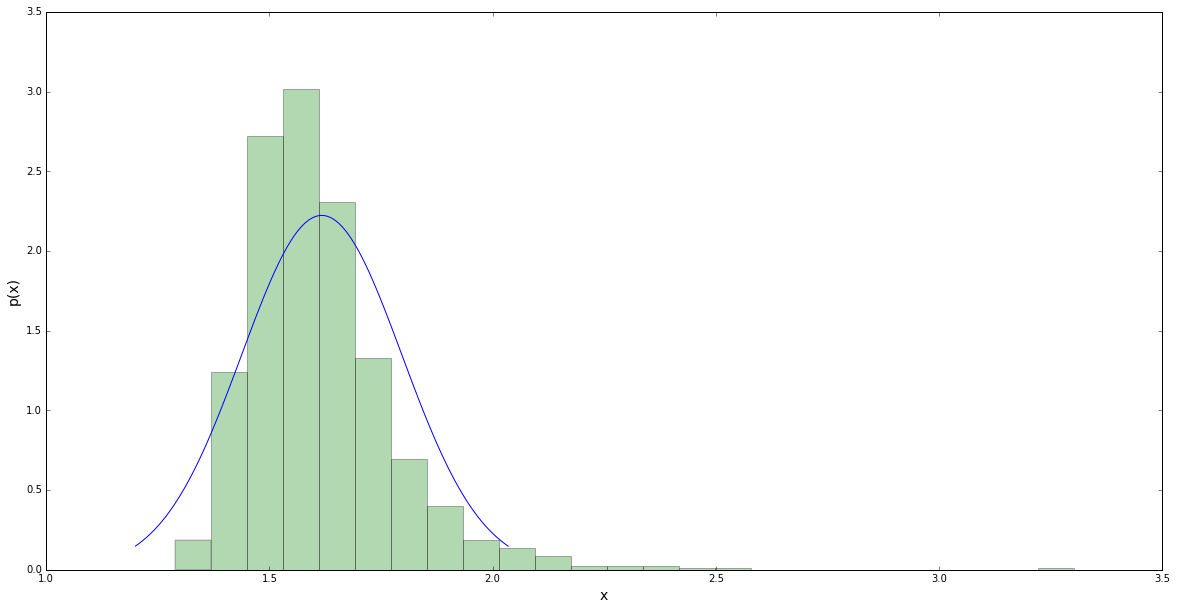

In [23]:
generate_ev_sample(50)

Видно, что нормальное распределение приблежает среднее, однако не так хорошо как хотелось бы, из-за того что распределение Парето скошено и начинается от 1 и нам "мешает" граница